In [1]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [6]:
data, labels = make_blobs(n_samples=[100, 100, 2],random_state=42)

### Data

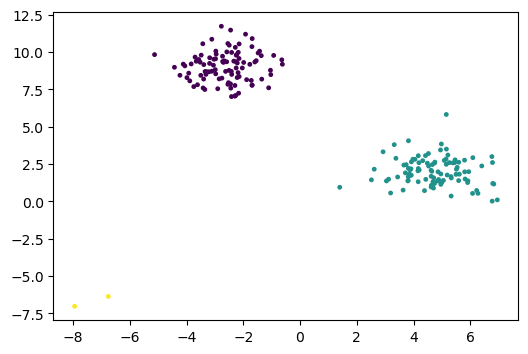

In [10]:
fig, ax = plt.subplots(figsize=[6, 4])
ax.scatter(data[:,0], data[:,1], c=labels, s=6)

### LOF Algorithm

In [11]:
def dist(x, y):
    return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

def k_dist(k, o, D):
    distances = np.array([dist(p,o) for p in D])
    indices = np.argsort(distances)
    kneighbours = D[indices[:k+1],:] # k+1 because the first one is dist to itself
    return dist(o, kneighbours[-1])

def N_k(k, o, D):
    k_d = k_dist(k, o, D)
    return np.array([p for p in D if dist(p,o) <= k_d and (p != o).all()])

def reach_dist(k, x, o, D):
    k_d = k_dist(k, o, D)
    return max(dist(x,o), k_d)

def lrd(k, o, D):
    k_d = k_dist(k, o, D)
    N = N_k(k,o, D)
    S = np.sum([reach_dist(k, o, x, D) for x in N])
    return 1/(S/N.shape[0])

def lof(k, o, D):
    N = N_k(k,o, D)
    lrdo = lrd(k,o,D)
    S = np.sum([lrd(k,x,D)/lrdo for x in N])
    return S / N.shape[0]

In [13]:
k = 5
lof_scores = np.array([lof(k, o, data) for o in data])

### Visualize results

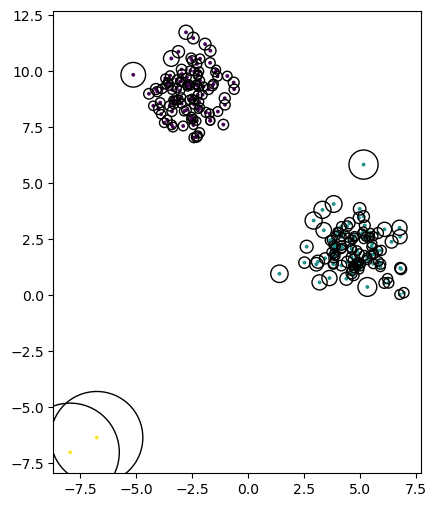

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data[:,0], data[:,1], c=labels, s=3)
ax.set_aspect(1)
for i in range(len(lof_scores)):
    ax.add_artist(plt.Circle(tuple(data[i]), lof_scores[i] / 5 , fill = False))

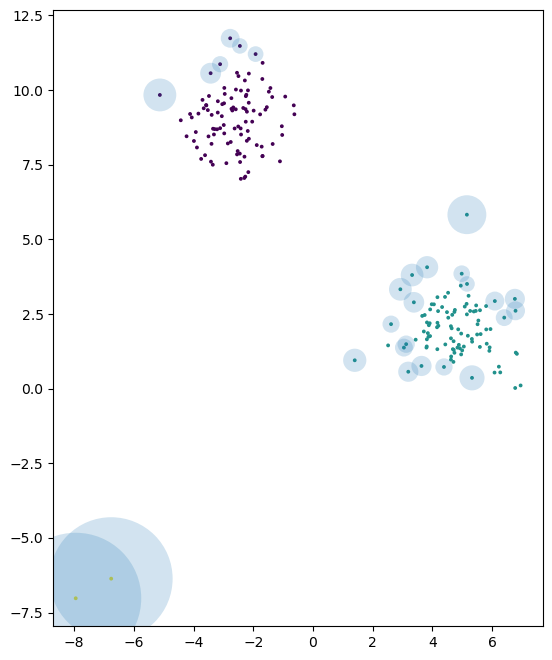

In [25]:
threshold = 1.3
# color possible outliers in blue 
fig2, ax2 = plt.subplots(figsize=(14, 8))
ax2.scatter(data[:,0], data[:,1], c=labels, s=3)
ax2.set_aspect(1)
for i in range(len(lof_scores)):
    if lof_scores[i] > threshold:
      ax2.add_artist(plt.Circle(tuple(data[i]), lof_scores[i] / 5 , fill = True, alpha=0.2))